In [2]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

# Get the current directory
current_dir = os.getcwd()
print(current_dir)

# Get the parent directory
parent_dir = os.path.dirname(current_dir)
#print(parent_dir)

# Insert the path to the parent directory
sys.path.insert(0, parent_dir)

from scripts.load_data import load_data_using_sqlalchemy
from scripts.UserExperience_Analysis import TelecomUserExperience


e:\10Academy\Tellco_DA\notebooks


In [3]:
# Define your SQL query
query = "SELECT * FROM xdr_data;"  # Replace with your actual table name

# Load data from PostgreSQL using SQLAlchemy
df = load_data_using_sqlalchemy(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data")
else:
    print("Failed to load data.")

Successfully loaded the data


In [4]:
# Initialize the class with the DataFrame
experience_analysis = TelecomUserExperience(df)

# Perform aggregation
customer_data = experience_analysis.aggregate_per_customer()
# Display the aggregated data
print(customer_data)

        MSISDN/Number  Average TCP Retransmission  Average RTT  \
0        3.360100e+10                1.078479e+07    23.000000   
1        3.360100e+10                1.078479e+07    15.500000   
2        3.360100e+10                1.078479e+07    63.729294   
3        3.360101e+10                3.803623e+05    42.000000   
4        3.360101e+10                7.735101e+06    29.750000   
...               ...                         ...          ...   
106851   3.379000e+10                1.090225e+05    26.000000   
106852   3.379000e+10                1.078479e+07    20.000000   
106853   3.197021e+12                1.078479e+07    63.729294   
106854   3.370000e+14                1.078479e+07    63.729294   
106855   8.823971e+14                1.078479e+07    63.729294   

        Average Throughput                      Handset Type  
0                38.000000    Huawei P20 Lite Huawei Nova 3E  
1                49.500000            Apple iPhone 7 (A1778)  
2                4

In [5]:
#  Compute & list 10 of the top, bottom, and most frequent:
experience_analysis.analyze_metrics()

TCP - Top 10:
 51560    34042618.5
85824    33807326.5
96139    33774490.5
39121    33749802.5
97327    33672115.5
89342    33516470.5
27236    33368998.5
67635    33292737.0
84217    33267078.0
96230    33258328.5
Name: Average TCP Retransmission, dtype: float64
TCP - Bottom 10:
 23472     48.5
6359      64.0
96977     64.5
13546     67.0
2177      71.5
25863     88.0
102198    88.0
105775    88.5
78100     89.5
89395     91.0
Name: Average TCP Retransmission, dtype: float64
TCP - Most Frequent 10:
 Average TCP Retransmission
1.078479e+07    55974
1.040560e+07      367
1.040562e+07      167
3.804943e+05      145
1.059520e+07       82
1.040562e+07       81
3.811593e+05       78
3.798753e+05       78
3.798483e+05       70
1.040629e+07       65
Name: count, dtype: int64

RTT - Top 10:
 32291    258.0
66760    252.0
95445    248.5
46358    248.0
86346    244.5
25725    244.0
48455    241.5
94970    240.5
43683    239.5
34214    238.0
Name: Average RTT, dtype: float64
RTT - Bottom 10:
 288

In [6]:
experience_analysis.compute_distribution()
experience_analysis.report_distribution()

Average Throughput per Handset Type:
Handset Type
Oppo Cph1723                        35334.0
Huawei Aum-Al00                     33912.0
Samsung Galaxy S9+                  33691.5
Huawei Y6 Prime 2018                33575.5
Huawei Hwi-Al00                     32640.5
                                     ...   
Samsung Gt-S6310N                       1.0
Quectel Wireless. Quectel Ec21-E        1.0
Quectel Wireless. Quectel Ec25-E        0.5
Wct Uno                                 0.0
Lg Lg-T385                              0.0
Name: Average Throughput, Length: 1396, dtype: float64

Average TCP Retransmission per Handset Type:
Handset Type
Huawei E587 E587U-2 Turkcell Vinnwifi E587    31542701.00
Zyxel Communicat. Sbg3600                     26743469.00
Samsung Galaxy Core 2 (Sm-G355X)              23279503.50
Sierra Wireless Usb305                        21662475.25
A-Link Telecom I. Cubot Note S                20705865.50
                                                 ...     
Oppo


Cluster Centers (Original Scale):
   Average TCP Retransmission  Average Throughput  Cluster
0                2.880152e+06        17233.117268        0
1                1.067558e+07          496.580306        1
2                2.471696e+06         4695.252400        2

Cluster 0:
Average TCP Retransmission: 2878965.32
Average Throughput: 17216.86

Cluster 1:
Average TCP Retransmission: 10675930.43
Average Throughput: 496.23

Cluster 2:
Average TCP Retransmission: 2472665.41
Average Throughput: 4687.08


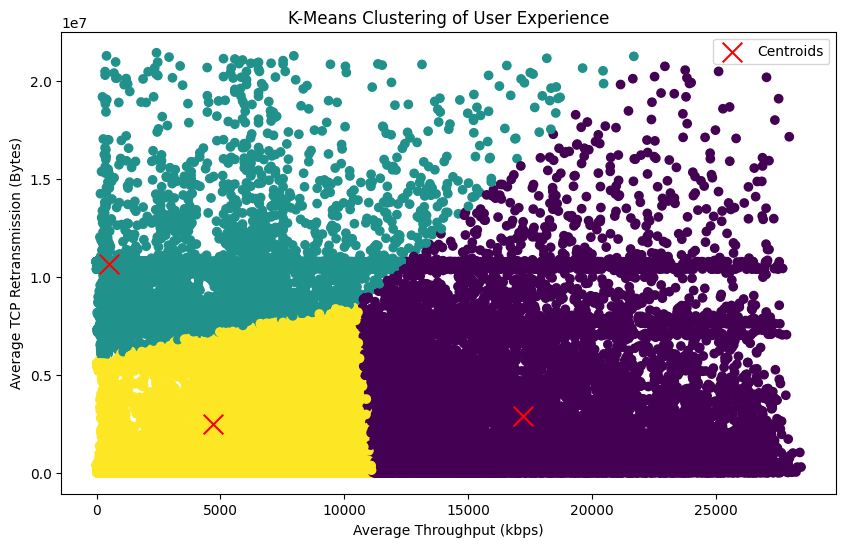

In [7]:
# Performing clustering
experience_analysis.perform_clustering(k=3)